In [98]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb 
import seaborn as sns
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 

### **1) Here I created the different percentage of the noise** 
#### **1-2) We multiply the splited datasets with these noise dataFrames**

In [99]:

# Noise Factor of 15 
# A bigger noise Factor


noise_factor_1 = -0.2
generated_noise_1 = noise_factor_1*np.random.rand(800)
generated_noise_1 = generated_noise_1.reshape(200,4)
generated_noise_1_dataFrame = pd.DataFrame(generated_noise_1, columns=['noise_column_1','noise_column_2', 'noise_column_3','noise_column_4'])

print(generated_noise_1_dataFrame)
print(type(generated_noise_1_dataFrame))



     noise_column_1  noise_column_2  noise_column_3  noise_column_4
0         -0.190662       -0.131779       -0.051445       -0.005157
1         -0.098375       -0.188401       -0.089234       -0.198868
2         -0.035090       -0.145353       -0.136765       -0.136967
3         -0.160732       -0.050565       -0.077786       -0.131325
4         -0.026511       -0.052317       -0.144073       -0.136336
..              ...             ...             ...             ...
195       -0.131470       -0.025121       -0.144776       -0.025585
196       -0.077890       -0.173374       -0.095660       -0.003238
197       -0.093460       -0.031531       -0.161662       -0.191392
198       -0.149754       -0.045577       -0.023708       -0.183200
199       -0.149602       -0.054264       -0.102215       -0.036796

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [100]:

# Noise factor of 5
# A smaller Noise Factor


noise_factor_2 = 5
generated_noise_2 = noise_factor_2*np.random.rand(800)
generated_noise_2 = generated_noise_2.reshape(200,4)
generated_noise_2_dataFrame = pd.DataFrame(generated_noise_2, columns=['noise_column_1','noise_column_2', 'noise_column_3','noise_column_4'])
print(generated_noise_2_dataFrame)


     noise_column_1  noise_column_2  noise_column_3  noise_column_4
0          4.022326        0.124032        0.448189        1.934265
1          0.714883        4.471885        0.309712        3.689250
2          4.796811        2.431585        0.321824        1.398847
3          3.887366        4.655302        4.423369        2.474904
4          0.054977        4.659184        1.357086        4.148712
..              ...             ...             ...             ...
195        0.950204        4.621982        4.150470        3.171604
196        0.773336        1.677563        3.812257        2.278462
197        2.177849        2.327912        1.038943        3.388483
198        2.195853        3.674047        4.522504        0.535834
199        0.451946        3.354092        4.393699        2.792267

[200 rows x 4 columns]


In [101]:

df_ad_data_set = pd.read_csv("./Advertising dataset.csv ")
#df_ad_data_set = df_ad_data_set.flatten()

print(df_ad_data_set.head)
print(df_ad_data_set.columns)
print(df_ad_data_set.shape)




<bound method NDFrame.head of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
(200, 4)


## **2) Read Data** 

In [102]:

def read_data():

    df_ad_data_set = pd.read_csv("./Advertising dataset.csv ")

    return df_ad_data_set


## **3) Pre-Processing and clean up**

In [103]:
# Here we remove the none values
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(method='ffill')

    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")

    return df        

In [104]:

# we load the data here

def load_data():
    
      df_ad_data_set = read_data()

      # From here we do the pre-processing
      df_ad_data_set = impute(df_ad_data_set)

      return df_ad_data_set
     

## **4) Measure the condition number with two different Norms**

In [105]:

# The dataFrame should be converted into array 
# In order to measure the condition number we need to have a square array 

df_ad_data_set = load_data()
print(df_ad_data_set)

a = df_ad_data_set.to_numpy()

print(type(a))
b = np.append(a,a, axis=1)
print(b.shape)
c = b.reshape(40,40)
print(c.shape)

# we calculate the norm here

print(np.linalg.cond(c))
print(LA.cond(c, -2))
print(LA.cond(c, 2))


        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]
<class 'numpy.ndarray'>
(200, 8)
(40, 40)
8.581023860886072e+35
1.1653621015531594e-36
8.581023860886072e+35


## **5) Checking the shape of the data**

In [106]:

df_ad_data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [107]:

df_ad_data_set.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [108]:

df_ad_data_set.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.0000
mean,145.377500,23.253000,30.738000,14.1050
std,85.771352,14.932955,21.577994,5.2172
min,0.700000,0.000000,0.300000,1.6000
25%,70.250000,9.825000,13.050000,10.4000
50%,145.100000,22.400000,26.050000,13.0500
75%,218.425000,36.650000,45.100000,17.4000
max,296.400000,49.600000,114.000000,27.0000


## **6-Finding highly correlated features**

In [109]:
 # We want to find highly correlated features

 correlation = df_ad_data_set.corr()
 print(correlation)
 

                 TV     radio  newspaper     sales
TV         1.000000  0.063275   0.052211  0.744296
radio      0.063275  1.000000   0.358478  0.577979
newspaper  0.052211  0.358478   1.000000  0.211051
sales      0.744296  0.577979   0.211051  1.000000


In [110]:

# Finding the highly corrolated Features:
highly_correlated_features = correlation.index[abs(correlation['sales']) > 0.5]
print(f'Highly Corrolated Features:', highly_correlated_features ,'\n')
print(f'No. of Highly Corrolated Features:', len(highly_correlated_features))


Highly Corrolated Features: Index(['TV', 'radio', 'sales'], dtype='object') 

No. of Highly Corrolated Features: 3


### **6-1) Finding highly correlated features based on the HeapMap**

Text(33.22222222222222, 0.5, 'Features')

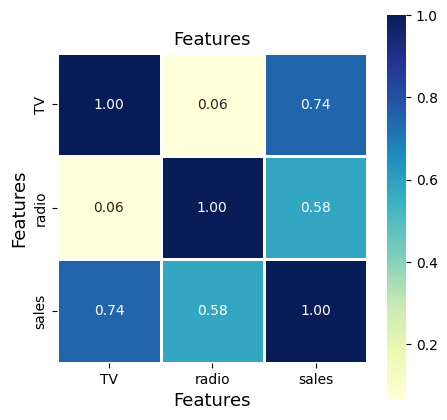

In [111]:
# Drawing the Heat Map of highly correlated features
# Here we create a HeatMap
# This is part of feature selection and correlation identification

plt.figure(figsize=(5,5))
sns.heatmap(df_ad_data_set[highly_correlated_features].corr(), annot=True, cmap='YlGnBu', cbar=True, fmt='.2f', square=True, linewidths=2)
plt.title('Features', fontsize=13)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Features', fontsize=13)



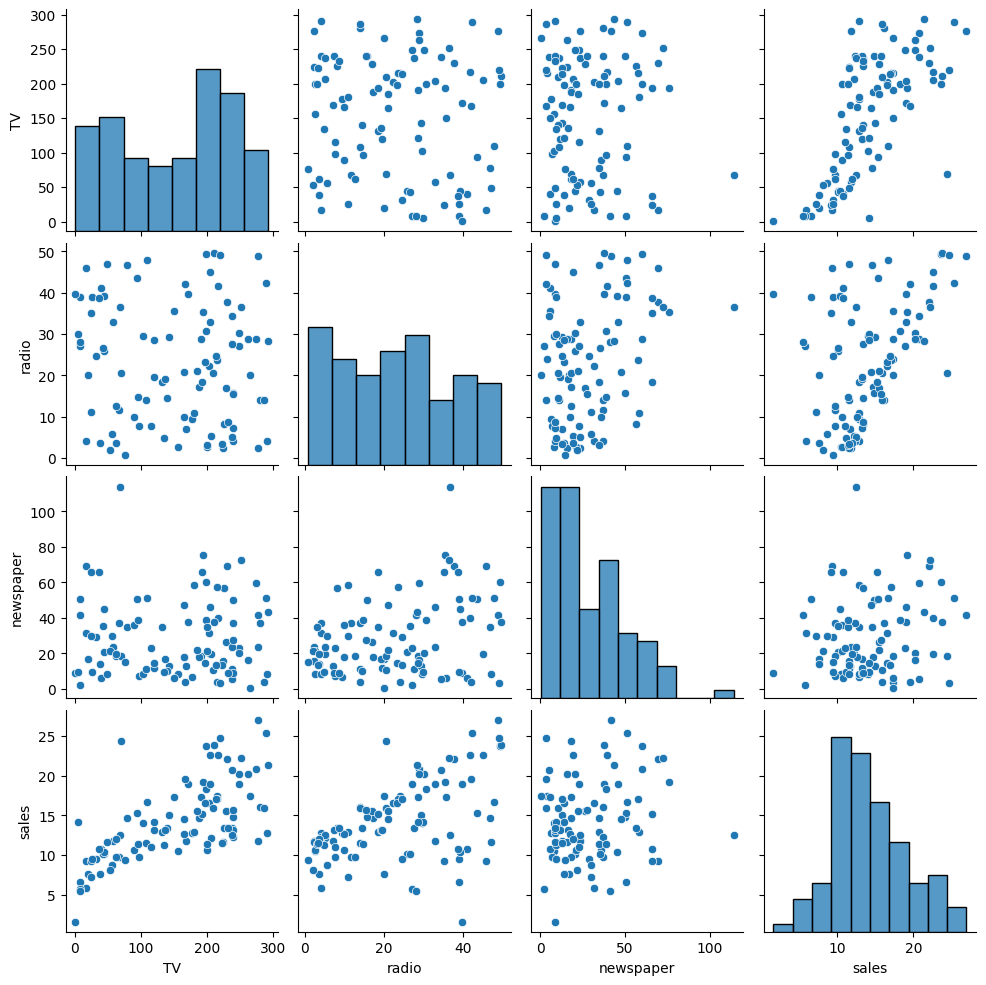

In [112]:
sns.pairplot(data=df_ad_data_set.sample(100))

In [113]:

# Finding te null values
df_ad_data_set.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [114]:

# Looking at the graphical presentation of the data
type(df_ad_data_set)
df_2 = pd.DataFrame(df_ad_data_set)
print(df_2.head())
df_2.shape



      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


(200, 4)

## **7) Checking the distribution of the data**

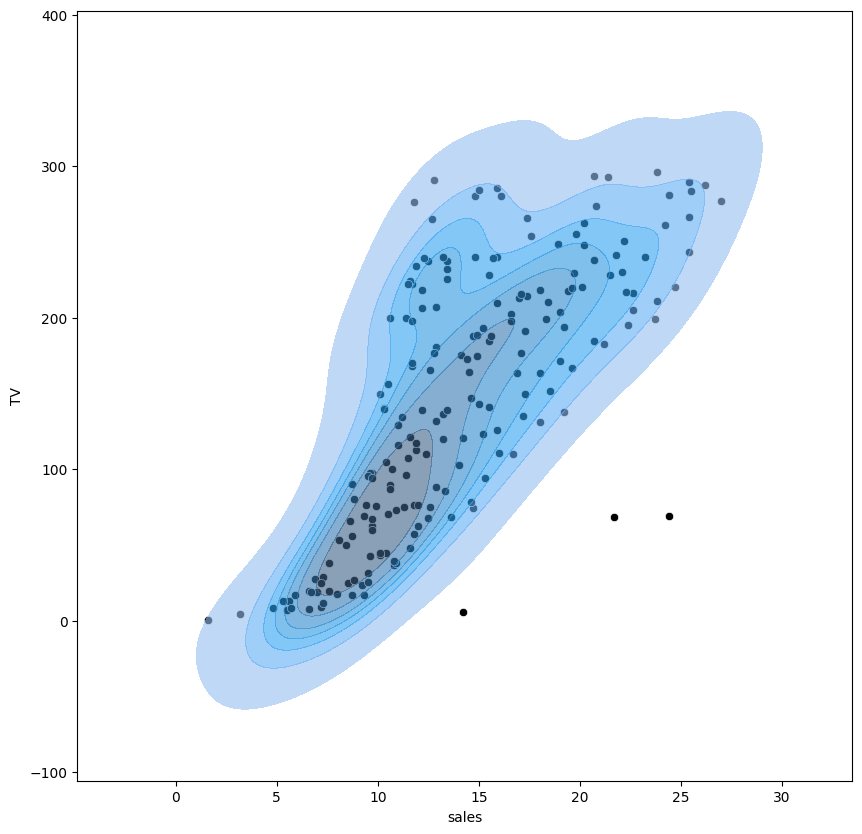

In [115]:
# The correlation between TV ads and sales 

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df_ad_data_set, x="sales", y="TV", color="k", ax=ax)
sns.kdeplot(data=df_ad_data_set, x="sales", y="TV", levels=8, fill=True, alpha=0.6, cut=3, ax=ax )

plt.show()


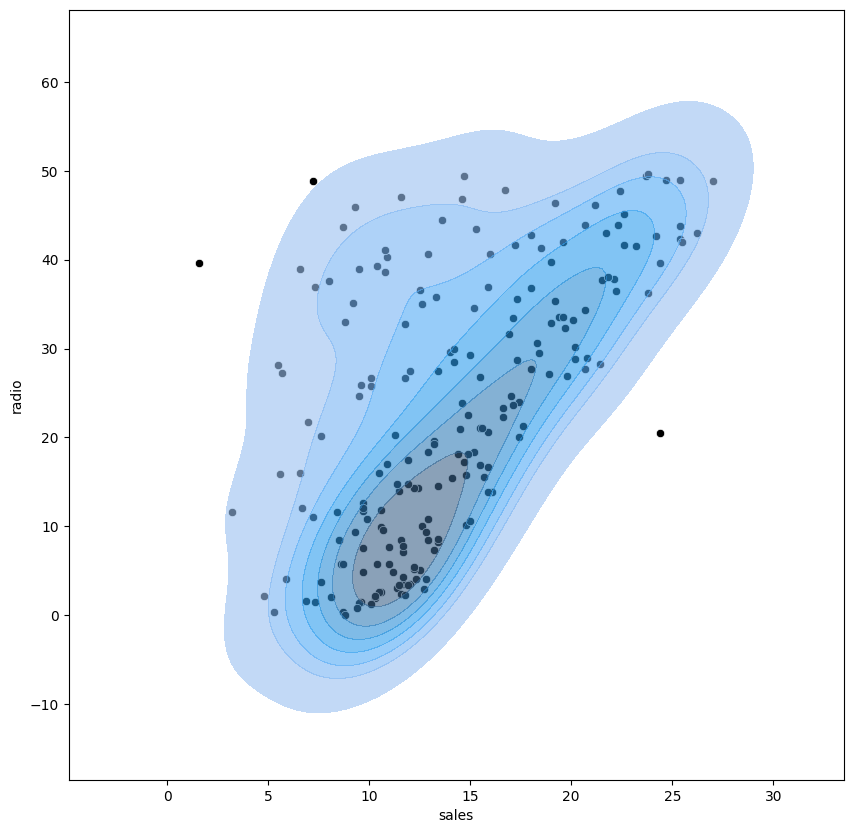

In [116]:
# The correlation between radio ads and sales 

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df_ad_data_set, x="sales", y="radio", color="k", ax=ax)
sns.kdeplot(data=df_ad_data_set, x="sales", y="radio", levels=8, fill=True, alpha=0.6, cut=3, ax=ax )

plt.show()

## **7) General Evalution Function For The Model**

In [117]:
'''
Evaluates different score for the predictes data
'''
def evaluate(y_test_reshaped, y_predict):
    
    print("Mean absolute error: %.2f" %np.mean(np.absolute(y_predict - y_test_reshaped)))
    print("Residual sum of squares (MSE): %.2f" %np.mean((y_predict - y_test_reshaped) ** 2))
    print("R2-score: %.2f" %r2_score(y_predict, y_test_reshaped))


### **7-1) We print the coeffecient of the model with this function**

In [118]:


def coeffecients(model):
    print("Coefficients of the model: ", model.coef_)
    print("Intercept of the model:  ", model.intercept_)
    

## **8) Spliting the data**

In [119]:

# These are the features. It  means we make prediction based on these two factors
X= df_ad_data_set['sales']
y= df_ad_data_set['TV']


# We split the train and test function here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.35, shuffle=True)

X_train.shape, X_test.shape , y_train.shape , y_test.shape



((130,), (70,), (130,), (70,))

In [120]:
# Rehshape the values
X_train_resh = X_train.values.reshape(-1,1)
y_train_resh = y_train.values.reshape(-1,1)
x_test_resh = X_test.values.reshape(-1,1)
y_test_resh = y_test.values.reshape(-1,1)




In [121]:
x_test_resh.shape, y_train_resh.shape , y_test_resh.shape, X_train_resh.shape

((70, 1), (130, 1), (70, 1), (130, 1))

## **9) Performing the Linear Regression**

In [122]:
# We build the model here

regression = LinearRegression()
regression.fit(X_train_resh, y_train_resh)
y_prediction = regression.predict(x_test_resh)
print(y_prediction)


[[229.41739153]
 [282.86864234]
 [ 82.42645179]
 [ 79.75388925]
 [193.33779723]
 [151.91307785]
 [ 49.01942004]
 [161.26704674]
 [262.82442329]
 [ 31.64776352]
 [278.85979853]
 [205.36432866]
 [165.27589055]
 [276.18723599]
 [242.78020423]
 [206.70060994]
 [155.92192166]
 [-25.8123311 ]
 [ 91.78042069]
 [111.82463974]
 [113.16092101]
 [153.24935912]
 [109.1520772 ]
 [131.8688588 ]
 [ 81.09017052]
 [159.93076547]
 [ 94.45298323]
 [ 85.09901433]
 [212.04573502]
 [ 67.72735782]
 [123.85117117]
 [ 69.06363909]
 [193.33779723]
 [181.3112658 ]
 [270.84211091]
 [129.19629626]
 [197.34664104]
 [115.83348355]
 [107.81579593]
 [ 78.41760798]
 [217.3908601 ]
 [ 79.75388925]
 [174.62985945]
 [214.71829756]
 [293.55889251]
 [174.62985945]
 [ 26.30263844]
 [150.57679658]
 [ 66.39107655]
 [ 23.6300759 ]
 [ 99.79810831]
 [238.77136042]
 [159.93076547]
 [ -4.43183078]
 [ 87.77157687]
 [ 94.45298323]
 [ 90.44413942]
 [313.60311156]
 [252.13417313]
 [ 93.11670196]
 [ 95.7892645 ]
 [111.82463974]
 [159.93

### **9-1) First Model Evaluation**

In [123]:
# How The First model is performing

print("LinearRegression score: %.2f" %regression.score(X_train_resh, y_train_resh))
coeffecients(regression)
evaluate(y_test_resh, y_prediction)
print(mean_squared_error(y_test_resh, y_prediction, squared=False))

del regression

LinearRegression score: 0.60
Coefficients of the model:  [[13.3628127]]
Intercept of the model:   [-47.19283143]
Mean absolute error: 46.25
Residual sum of squares (MSE): 4127.63
R2-score: 0.27
64.24660674138642


### **9-2) Model Evaluation with statsmodels APi**

In [124]:
# The model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_resh)
Linear_regression_model = sm.OLS(y_train_resh, X_train_sm).fit()
Linear_regression_model.params
print(Linear_regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     193.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.30e-27
Time:                        18:54:59   Log-Likelihood:                -702.20
No. Observations:                 130   AIC:                             1408.
Df Residuals:                     128   BIC:                             1414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.1928     14.156     -3.334      0.0

## **9-3) Visualize the Linear Regression Model**

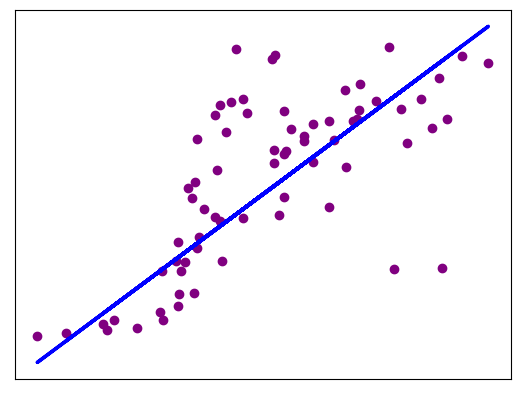

In [125]:


plt.scatter(x_test_resh, y_test_resh, color="purple")
plt.plot(x_test_resh, y_prediction, color="blue", linewidth=2.5)

plt.xticks(())
plt.yticks(())

plt.show()


### **10) Multiplication of the First Noise DataFrame** 

In [126]:


# Here we add the noise to the input
df_ad_data_set_with_noise_1 = df_ad_data_set.mul(generated_noise_1_dataFrame.values)
print(df_ad_data_set_with_noise_1)
print(type(df_ad_data_set_with_noise_1))




            TV     radio  newspaper     sales
0   -43.871325 -4.981234  -3.559993 -0.113980
1    -4.377699 -7.404157  -4.024453 -2.068231
2    -0.603549 -6.671701  -9.477789 -1.273795
3   -24.350962 -2.088349  -4.550471 -2.429517
4    -4.793165 -0.565027  -8.413867 -1.758734
..         ...       ...        ...       ...
195  -5.022149 -0.092949  -1.997903 -0.194445
196  -7.337209 -0.849534  -0.774845 -0.031411
197 -16.542388 -0.293238  -1.034634 -2.449822
198 -42.470342 -1.914226  -1.569454 -4.671607
199 -34.722684 -0.466672  -0.889267 -0.493064

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [127]:

X= df_ad_data_set_with_noise_1['sales']
y= df_ad_data_set_with_noise_1['TV']


# We split the train and test function here
X_train_with_noise_1 , X_test_with_noise_1 , y_train_with_noise_1 , y_test_with_noise_1 = train_test_split(X, y, random_state=104, test_size=0.35, shuffle=True)


In [128]:
# Re-excute the Model with noise number one

x_train_with_noise_1_reshaped = X_train_with_noise_1.values.reshape(-1,1)
y_train_with_noise_1_reshaped = y_train_with_noise_1.values.reshape(-1,1)
x_test_with_noise_1_reshaped = X_test_with_noise_1.values.reshape(-1,1)
y_test_with_noise_1_reshaped = y_test_with_noise_1.values.reshape(-1,1)

regression_1 = LinearRegression()
regression_1.fit(x_train_with_noise_1_reshaped, y_train_with_noise_1_reshaped)

y_prediction_for_noisy_data_1 = regression_1.predict(x_test_with_noise_1_reshaped)
print(y_prediction_for_noisy_data_1)


[[-16.87097434]
 [-18.18750909]
 [-10.45568354]
 [-15.48349917]
 [-19.81386147]
 [-15.42996547]
 [-13.44518463]
 [-13.91455185]
 [-18.54607231]
 [-11.82338859]
 [-14.33916925]
 [-20.57331587]
 [-18.55870199]
 [-13.96804192]
 [-14.01571611]
 [-17.45823952]
 [-15.60960737]
 [-10.66117297]
 [-16.4907754 ]
 [-13.65051258]
 [-17.13833779]
 [-11.61344281]
 [-13.46028226]
 [-12.05796295]
 [-15.97344955]
 [-16.08393775]
 [-14.46197871]
 [-14.17785303]
 [-10.82928978]
 [-11.0069316 ]
 [-17.78936302]
 [-13.63261385]
 [-10.82484375]
 [-16.09474502]
 [-23.24772698]
 [-13.74739077]
 [-13.2769789 ]
 [-12.74180174]
 [-11.1154308 ]
 [-13.07665803]
 [-18.69204213]
 [-15.7304925 ]
 [-12.51284864]
 [-13.42264363]
 [-24.16306684]
 [-11.86317768]
 [-11.96091697]
 [-12.40528583]
 [-14.72487854]
 [-12.65854692]
 [-10.41562229]
 [-10.48326232]
 [-17.48505512]
 [-10.48991016]
 [-14.65666946]
 [-15.20428103]
 [-14.71024251]
 [-20.69704618]
 [-21.99996549]
 [-12.5726229 ]
 [-12.4841765 ]
 [-16.27582074]
 [-17.60

### **10-1) The Evaluation of the Second Model**

In [129]:
# How model is performing
print("LinearRegression score: %.2f" %regression_1.score(x_train_with_noise_1_reshaped, y_train_with_noise_1_reshaped))
coeffecients(regression_1)
evaluate(y_test_with_noise_1_reshaped, y_prediction_for_noisy_data_1)
print(mean_squared_error(y_test_with_noise_1_reshaped, y_prediction_for_noisy_data_1, squared=False))

del regression_1
     

LinearRegression score: 0.04
Coefficients of the model:  [[2.94705439]]
Intercept of the model:   [-10.39558698]
Mean absolute error: 11.55
Residual sum of squares (MSE): 203.16
R2-score: -18.97
14.253411769920769


### **10-2) Model Evaluation with statsmodels APi**

In [130]:

X_train_sm_1 = sm.add_constant(x_train_with_noise_1_reshaped)
Linear_regression_model = sm.OLS(y_train_with_noise_1_reshaped, X_train_sm_1).fit()
Linear_regression_model.params
print(Linear_regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     5.524
Date:                Thu, 09 Mar 2023   Prob (F-statistic):             0.0203
Time:                        18:55:28   Log-Likelihood:                -517.47
No. Observations:                 130   AIC:                             1039.
Df Residuals:                     128   BIC:                             1045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3956      2.165     -4.803      0.0

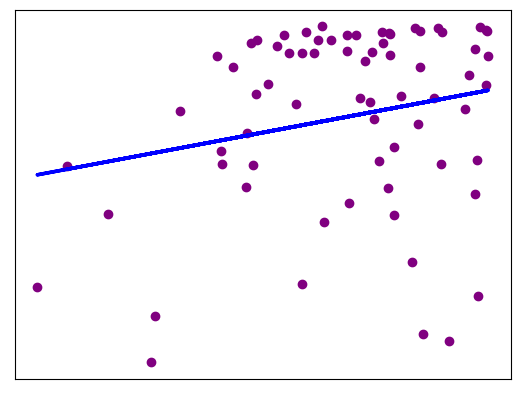

In [131]:

plt.scatter(x_test_with_noise_1_reshaped, y_test_with_noise_1_reshaped, color="purple")
plt.plot(x_test_with_noise_1_reshaped, y_prediction_for_noisy_data_1, color="blue", linewidth=2.5)

plt.xticks(())
plt.yticks(())

plt.show()


#### **10-3) Measure the condition number of noisy input for the Second input**

In [132]:

df_ad_data_set_with_noise_1.shape
df_ad_data_set_with_noise_1 = df_ad_data_set_with_noise_1.values.reshape(-1,2)
df_ad_data_set_with_noise_1.shape


print(np.linalg.cond(df_ad_data_set_with_noise_1))
print(LA.cond(df_ad_data_set_with_noise_1 ))
print(LA.cond(df_ad_data_set_with_noise_1, -2))


6.5670218950709325
6.5670218950709325
0.15227602648174188


### **11) Multplication of the noise dataframe for the third model**

In [133]:

# Here we add the noise to the input
df_ad_data_set_with_noise_2 = df_ad_data_set.mul(generated_noise_2_dataFrame.values)
print(df_ad_data_set_with_noise_2)
print(type(df_ad_data_set_with_noise_2))


             TV       radio   newspaper      sales
0    925.537185    4.688407   31.014677  42.747258
1     31.812286  175.745062   13.968010  38.368200
2     82.505156  111.609770   22.302401  13.009280
3    588.935959  192.263962  258.767088  45.785731
4      9.939787   50.319182   79.253810  53.518379
..          ...         ...         ...        ...
195   36.297789   17.101335   57.276485  24.104189
196   72.848242    8.220059   30.879283  22.101082
197  385.479335   21.649583    6.649232  43.372582
198  622.743835  154.309959  299.389750  13.663757
199  104.896647   28.845192   38.225185  37.416373

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [134]:
X= df_ad_data_set_with_noise_2['sales']
y= df_ad_data_set_with_noise_2['TV']


# We split the train and test function here
X_train_with_noise_2 , X_test_with_noise_2 , y_train_with_noise_2 , y_test_with_noise_2 = train_test_split(X, y, random_state=104, test_size=0.35, shuffle=True)

## **11-1) Re-excute the Model with noise for the third input**



In [135]:
x_train_with_noise_2_reshaped = X_train_with_noise_2.values.reshape(-1,1)
y_train_with_noise_2_reshaped = y_train_with_noise_2.values.reshape(-1,1)
x_test_with_noise_2_reshaped = X_test_with_noise_2.values.reshape(-1,1)
y_test_with_noise_2_reshaped = y_test_with_noise_2.values.reshape(-1,1)

regression_2 = LinearRegression()
regression_2.fit(x_train_with_noise_2_reshaped, y_train_with_noise_2_reshaped)

y_prediction_for_noisy_data_2 = regression_2.predict(x_test_with_noise_2_reshaped)
print(y_prediction_for_noisy_data_2)




[[299.7178256 ]
 [206.91226074]
 [346.23197394]
 [378.18699956]
 [259.08327952]
 [367.33637268]
 [256.86499586]
 [412.04922916]
 [244.70912536]
 [249.0350705 ]
 [276.82546731]
 [245.17057265]
 [365.09676145]
 [408.29102673]
 [253.83164635]
 [366.19547455]
 [419.96934674]
 [226.56701605]
 [346.01810977]
 [363.30840193]
 [370.58282669]
 [209.47563398]
 [274.90400778]
 [334.04938451]
 [244.68363777]
 [219.20826148]
 [322.3565372 ]
 [297.94987168]
 [501.82281989]
 [223.10070738]
 [335.34438714]
 [277.45858704]
 [370.46824289]
 [471.0397915 ]
 [560.46887531]
 [442.52859332]
 [260.86239755]
 [289.09611072]
 [314.64876761]
 [229.58651414]
 [263.16569112]
 [210.30940022]
 [214.51805042]
 [495.82853839]
 [250.56589456]
 [254.53999044]
 [224.56284056]
 [449.9336337 ]
 [220.1578071 ]
 [265.14695398]
 [265.65041135]
 [353.25586904]
 [394.78104383]
 [203.24755022]
 [254.25276169]
 [363.87247768]
 [341.94975487]
 [395.42966551]
 [610.55649448]
 [264.03466867]
 [246.23657267]
 [237.55791707]
 [267.82

### **11-3) Evaluation for the Third Model** 

In [136]:
# How model is performing
print("LinearRegression score: %.2f" %regression_2.score(x_train_with_noise_2_reshaped, y_train_with_noise_2_reshaped))
coeffecients(regression_2)
evaluate(y_test_with_noise_2_reshaped, y_prediction_for_noisy_data_2)
print(mean_squared_error(y_test_with_noise_2_reshaped, y_prediction_for_noisy_data_2, squared=False))

del regression_2
     

LinearRegression score: 0.09
Coefficients of the model:  [[3.86376715]]
Intercept of the model:   [197.77232005]
Mean absolute error: 297.72
Residual sum of squares (MSE): 146412.94
R2-score: -16.80
382.63943830381174


### **11-2) Model Evaluation with statsmodels APi**

In [137]:

X_train_sm_2 = sm.add_constant(x_train_with_noise_2_reshaped)
Linear_regression_model = sm.OLS(y_train_with_noise_2_reshaped, X_train_sm_1).fit()
Linear_regression_model.params
print(Linear_regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     14.18
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           0.000252
Time:                        18:55:50   Log-Likelihood:                -933.26
No. Observations:                 130   AIC:                             1871.
Df Residuals:                     128   BIC:                             1876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.8172     53.018      3.278      0.0

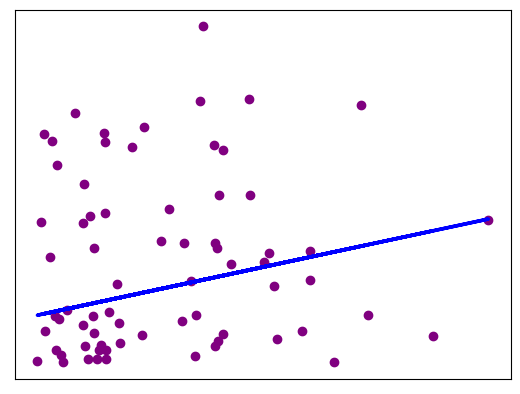

In [138]:

plt.scatter(x_test_with_noise_2_reshaped, y_test_with_noise_2_reshaped, color="purple")
plt.plot(x_test_with_noise_2_reshaped, y_prediction_for_noisy_data_2, color="blue", linewidth=2.5)

plt.xticks(())
plt.yticks(())

plt.show()


### **11-4) Measuring the condition number for the third input** 

In [139]:

print(np.linalg.cond(df_ad_data_set_with_noise_2))
print(LA.cond(df_ad_data_set_with_noise_2 ))
print(LA.cond(df_ad_data_set_with_noise_2, -2))


20.24633797119521
20.24633797119521
0.049391648080888306
